In [1]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

RANDOM_STATE = 57

In [2]:
train_df = pd.read_csv('train_df.csv')
train_df.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')

y_mnth = train_df.target_month

y_d = train_df.target_day

In [3]:
train_df.head()

,wagnum,month,target_month,target_day,last_prob,daily_avg_probeg_per_mnth,rolling_daily_avg,ost_prob,days_from_kap_rem,days_from_dep_rem,...,tara,cnsi_probeg_dr,cnsi_probeg_kr,days_from_build,days_to_liq,days_from_pr_rem,tr_rem_cnt_before,days_from_last_tr_rem,predict_probeg_in_10_days,predict_probeg_in_1_mnth
0,33361,2023-01-01,0,0,153692.0,207.466667,93.071494,153113.0,1049.000000,1937.0,...,245,110,160,4345,3712,41.000000,2.000000,92.000000,152182.285057,150320.855172
1,33364,2023-01-01,0,0,157438.0,227.666667,262.708046,157426.0,820.000000,1736.0,...,245,110,160,4638,3023,24.000000,1.000000,31.000000,154798.919540,149544.758621
2,33366,2023-01-01,0,0,159999.0,50.266667,67.653333,159748.0,1937.104444,1003.0,...,245,110,160,4575,3307,28.000000,2.000000,153.000000,159071.466667,157718.400000
3,33358,2023-01-01,0,0,28597.0,54.200000,89.137701,28597.0,677.000000,1251.0,...,245,110,160,3748,3621,57.193483,1.000000,153.000000,27705.622989,25922.868966
4,33349,2023-01-01,0,0,150043.0,126.533333,105.931954,150043.0,909.000000,1674.0,...,245,110,160,4060,3990,87.000000,1.483167,65.956427,148983.680460,146865.041379


In [4]:
train_df.month = pd.to_datetime(train_df.month)
train_df_no_dates = train_df

In [5]:
X = train_df.drop(columns=['wagnum', 'month', 'target_month', 'target_day'])

y = train_df[['target_month', 'target_day']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=RANDOM_STATE)

In [7]:
y_train_day = y_train.target_day
y_train_month = y_train.target_month
y_test_day = y_test.target_day
y_test_month = y_test.target_month

In [8]:
k_fold = 5 
stratified_kfold = StratifiedKFold(n_splits=k_fold, shuffle=True)

scorer = make_scorer(f1_score, average='weighted')

In [9]:
gs_CB_day_est = CatBoostClassifier(loss_function='Logloss', verbose=True, random_state=RANDOM_STATE,
                                   depth = 3,
                                   iterations = 100,
                                   learning_rate = 0.7,
                                   l2_leaf_reg=0.5)
gs_CB_day_est.fit(X_train, y_train_day, verbose=0)

Text(0.5, 1.0, 'Feature Importance')

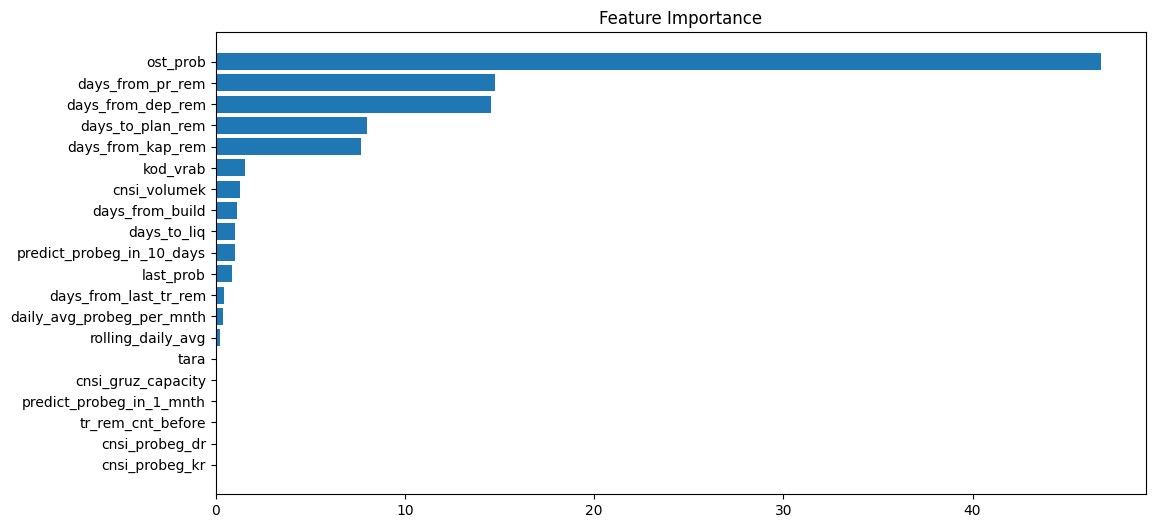

In [10]:
feature_importance = gs_CB_day_est.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')